<a href="https://colab.research.google.com/github/Forrestjohnson2000/6162-Seabreeze/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Buoy Data

The first data we collected for the calculation of Sea Breeze was from Station 41033 - Fripp Nearshore, SC. This data was suggested to us by Meteorologist Joe Merchant who belived it was a good collection of data as it included columns including air temperature and water temperature. These variables were important to collect as the difference between the air/water temp from the buoy compared to the land temperature are significant indicators of a sea breeze. The buoy data was collected from the last 10 years and included the columns Year, Month, Day, Minute, Hour, Wind Direction, Wind Speed, Gust, Air Pressure, Air Temperature, and Water temperature. To create this buoy data, we had to combine data collected from 10 individual years’ worth of data and combine it into one spreadsheet which we named Buoy Data. From there, we cleaned up the data in a couple ways. We combined the Year Month and Day columns into a date column so we could have a column to merge the buoy data with other datasets and we also utilized a simple imputer to impute the mean values for the significant amounts of missing data we encountered in some variables. Finally, we created a couple of graphs showing the interactions between each of the variables and saw some definite correlations between variables like Gust and Wind Speed and Air Temperature and Water Temperature.



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
buoy = pd.read_csv('Buoy.csv', parse_dates = {"date" : ["#YY","MM","DD"]} )
buoy
buoy.drop(["mm"], axis=1)

date  hh  WDIR  WSPD   GST    PRES  ATMP   WTMP
0     2020-01-01   0   257   5.3   7.1  1016.2  13.9   13.8
1     2020-01-01   1   255   5.9   8.4  1016.4  13.7   13.7
2     2020-01-01   2   254   7.4   9.2  1016.6  13.5   13.6
3     2020-01-01   3   257   7.8  10.1  1016.8  13.2   13.6
4     2020-01-01   4   260   7.8  10.1  1016.7  12.8   13.6
...          ...  ..   ...   ...   ...     ...   ...    ...
75762 2010-12-31  18    60   4.0  99.0  1022.8   9.6  999.0
75763 2010-12-31  20    70   4.0  99.0  1022.2  10.1  999.0
75764 2010-12-31  21    80   3.0  99.0  1022.2  10.4  999.0
75765 2010-12-31  22    80   3.0  99.0  1022.4  11.1  999.0
75766 2010-12-31  23    30   2.0  99.0  1023.0  10.7  999.0

[75767 rows x 8 columns]

In [ ]:
#Checking the datatypes of inported data, these seem to make sense
buoy.dtypes

date    datetime64[ns]
hh               int64
mm               int64
WDIR             int64
WSPD           float64
GST            float64
PRES           float64
ATMP           float64
WTMP           float64
dtype: object

In [ ]:
buoy.describe()

hh            mm  ...          ATMP          WTMP
count  75767.000000  75767.000000  ...  75767.000000  75767.000000
mean      11.494846      4.478322  ...     41.736301    554.183938
std        6.920052      4.981954  ...    144.280182    486.641218
min        0.000000      0.000000  ...     -5.900000      5.500000
25%        6.000000      0.000000  ...     14.500000     24.400000
50%       11.000000      8.000000  ...     21.200000    999.000000
75%       17.000000      8.000000  ...     26.900000    999.000000
max       23.000000     53.000000  ...    999.000000    999.000000

[8 rows x 8 columns]

In [ ]:
#replacing values with na as 99, 999, 9999 are missing data
buoy["WDIR"].replace({999.0:np.nan}, inplace=True)
buoy["GST"].replace({99.0:np.nan}, inplace=True)
buoy["PRES"].replace({9999.0:np.nan}, inplace=True)
buoy["ATMP"].replace({999.0:np.nan}, inplace=True)
buoy["WTMP"].replace({999.0:np.nan}, inplace=True)
buoy["WSPD"].replace({99.0:np.nan}, inplace=True)

In [ ]:
#Checking our data to see current statistics per each variable that was skewed by the 99/999/9999 
buoy[["GST", "WDIR", "PRES", "ATMP", "WTMP", "WSPD"]].describe()

GST          WDIR  ...          WTMP          WSPD
count  56064.000000  75296.000000  ...  34490.000000  75680.000000
mean       7.296079    170.553695  ...     21.836225      5.460706
std        3.496994     99.208078  ...      6.584634      2.642720
min        0.000000      0.000000  ...      5.500000      0.000000
25%        4.900000     74.000000  ...     15.400000      3.600000
50%        7.000000    190.000000  ...     23.200000      5.100000
75%        9.500000    240.000000  ...     28.300000      7.000000
max       40.700000    360.000000  ...     31.900000     30.300000

[8 rows x 6 columns]

In [ ]:
#We can see from this that there is significant data loss in some categories with WDIR, GST, PRES, ATMP, WTMP all have
#missing values, especially GST, PRES, and WTMP so we will need to handle that lost data
print(buoy.isnull().sum())
print(buoy.info())

date        0
hh          0
mm          0
WDIR      471
WSPD       87
GST     19703
PRES     9854
ATMP     1679
WTMP    41277
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75767 entries, 0 to 75766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    75767 non-null  datetime64[ns]
 1   hh      75767 non-null  int64         
 2   mm      75767 non-null  int64         
 3   WDIR    75296 non-null  float64       
 4   WSPD    75680 non-null  float64       
 5   GST     56064 non-null  float64       
 6   PRES    65913 non-null  float64       
 7   ATMP    74088 non-null  float64       
 8   WTMP    34490 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 5.2 MB
None


In [ ]:
#Imputing the missing data
from sklearn.impute import SimpleImputer

In [ ]:
#Imputing the mean into the missing data
buoy_mean = buoy.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
buoy_mean.iloc[:,3:] = mean_imputer.fit_transform(buoy_mean.iloc[:,3:])
buoy_mean[["GST", "WDIR", "PRES", "ATMP", "WTMP", "WSPD"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75767 entries, 0 to 75766
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GST     75767 non-null  float64
 1   WDIR    75767 non-null  float64
 2   PRES    75767 non-null  float64
 3   ATMP    75767 non-null  float64
 4   WTMP    75767 non-null  float64
 5   WSPD    75767 non-null  float64
dtypes: float64(6)
memory usage: 3.5 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b14513790>,
      dtype=object)

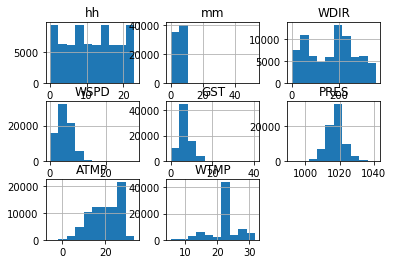

In [ ]:
#Creating a histogram of the given data, we can ignore month, year, day, hour and minute distributions
#From the below graph we can see that windspeed and wind direction are not normally distributed, neither is pressure or Air temp
import matplotlib.pyplot as plt
buoy_mean.hist()

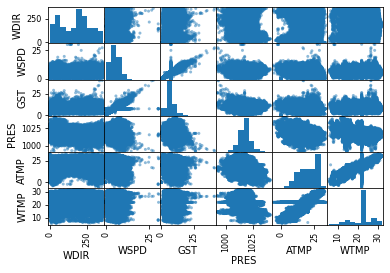

In [ ]:
#Creating a scatter matrix of all the variables
#There does not look like many strong correlations except for between gust and wind speed which appear to be highly correlated
#This would make sense as high wind speeds create gusts so these two variables are positively correlated
from pandas.plotting import scatter_matrix
scatter_matrix(buoy_mean[["WDIR", "WSPD", "GST", "PRES", "ATMP", "WTMP"]])
plt.show()

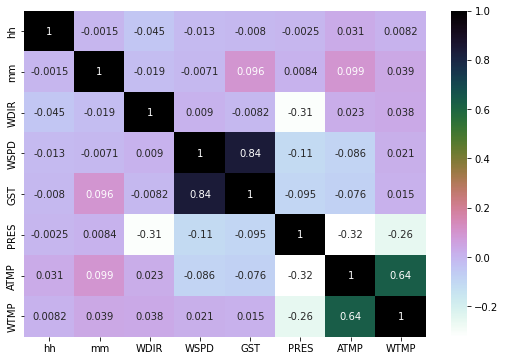

In [ ]:
#Here we have a correlation heatmap
#What we take from this is that Windspeed and Gust are highly correlated at .84, Air Temp and Water Temp are fairly correlated
#at .64, and Month and Air Temp are somewhat positively correlated at .32
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(buoy_mean.corr(),annot=True,cmap='cubehelix_r')
plt.show()

## Weather Station Data

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

In [ ]:
stationHXD_data = pd.read_csv("HXD (1).csv")
stationSUT_data = pd.read_csv("SUT (1).csv")

FileNotFoundError: ignored

In [ ]:
stationHXD_data.head(10)

In [ ]:
stationHXD_data.info()

In [ ]:
stationHXD_data.describe()

In [ ]:
stationSUT_data.info()

In [ ]:
stationHXD_data.valid = pd.to_datetime(stationHXD_data.valid)
stationSUT_data.valid = pd.to_datetime(stationSUT_data.valid)

In [ ]:
stationSUT_data.head(10)

In [ ]:
stationSUT_data.dtypes

Preprocessing

In [ ]:
#Dropping column with all null values
stationHXD_data = stationHXD_data.drop(labels = "mslp", axis = 1)
stationHXD_data.info()

In [ ]:
stationHXD_data.isnull().sum()

proportion = stationHXD_data.isnull().sum()/len(stationHXD_data.index)
pct = round(proportion*100, 3)
print(pct)

In [ ]:
#Drop the variables with na's over 50% of the data
stationHXD_data = stationHXD_data.drop(labels = ["gust_mph", "skyc2", "skyl1"], axis = 1)

stationHXD_data.head()

In [ ]:
stationSUT_data.isnull().sum()

In [ ]:
proportion = stationSUT_data.isnull().sum()/len(stationSUT_data.index)
pct = round(proportion*100, 3)
print(pct)

In [ ]:
#Drop variables with na's greater than 50% of the data
stationSUT_data = stationSUT_data.drop(labels = ["gust_mph", "skyc2", "skyl1"], axis = 1)

stationSUT_data.head()

In [ ]:
##Impute missing values of variables tmpc, dwpc, relh, feel, drct, and sped
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy="mean")
stationHXD_data.loc[:,["tmpc", "dwpc", "relh", "feel", "drct", "sped"]] = mean_imputer.fit_transform(stationHXD_data[["tmpc", "dwpc", "relh", "feel", "drct", "sped"]])
stationSUT_data.loc[:,["tmpc", "dwpc", "relh", "feel", "drct", "sped"]] = mean_imputer.fit_transform(stationSUT_data[["tmpc", "dwpc", "relh", "feel", "drct", "sped"]])
stationHXD_data.info()



In [ ]:
#Impute skyc1 using mode
mode_imputer = SimpleImputer(strategy = "most_frequent")
stationHXD_data.loc[:,["skyc1"]] = mode_imputer.fit_transform(stationHXD_data[["skyc1"]])
stationSUT_data.loc[:,["skyc1"]] = mode_imputer.fit_transform(stationSUT_data[["skyc1"]])
stationHXD_data.info()

In [ ]:
#Convert Datetime column to multiple columns
stationHXD_data["hour"] = stationHXD_data.valid.dt.hour
stationSUT_data["hour"] = stationSUT_data.valid.dt.hour

stationHXD_data["date"] = stationHXD_data.valid.dt.date
stationSUT_data["date"] = stationSUT_data.valid.dt.date

stationHXD_data.head()
stationSUT_data.head()

In [ ]:
stationHXD_data.date = pd.to_datetime(stationHXD_data.date)
stationSUT_data.date = pd.to_datetime(stationSUT_data.date)
stationHXD_data.info()

In [ ]:
#Delete valid column as it is redundant
stationHXD_data = stationHXD_data.drop("valid", axis = 1)
stationSUT_data = stationSUT_data.drop("valid", axis = 1)

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [ ]:
scatter_matrix(stationSUT_data)

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(stationHXD_data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

## Old Station Data

In [ ]:
import re

In [ ]:
wilstation_data_selected = pd.read_csv("pm200p1p1_197501-202112updated.txt", index_col = False, sep = "\s", 
                              engine = 'python',
                              header = 0,
                              #low_memory = False, 
                              usecols = ["YEAR", "MO", "DY", "HR", "MN", "Hs","Tp","Dp"],
                              skipinitialspace = True,
                              skiprows = [1]) #parse_dates = [[0,1,2,3,4]])

In [ ]:
wilstation_data_selected.head(10)

In [ ]:
wilstation_data_selected.describe()

In [ ]:
wilstation_data_selected.isnull().sum()

In [ ]:
kilstation_data_selected = pd.read_csv("pm150p1p1_197501-202112updated.txt", index_col = False, sep = "\s", 
                              header = 0, engine = 'python', #low_memory = False, 
                              usecols = ["YEAR", "MO","DY","HR","MN","Hs", "Tp", "Dp"],
                              skipinitialspace = True,
                              skiprows = [1])

In [ ]:
kilstation_data_selected.head()

In [ ]:
kilstation_data_selected.info()

In [ ]:
kilstation_data_selected.isnull().sum()

In [ ]:
kilstation_data.describe()

In [ ]:
#Imputing the missing data
from sklearn.impute import SimpleImputer

In [ ]:
#Imputing the mean into the missing data
station_mean = wilstation_data_selected.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
wilstation_data_selected.iloc[:,:] = mean_imputer.fit_transform(station_mean)
wilstation_data_selected[["Hs", "Tp", "Dp"]].describe()

In [ ]:
wilstation_data_selected.isnull().sum()

In [ ]:
#Imputing the mean into the missing data
station_mean = kilstation_data_selected.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
kilstation_data_selected.iloc[:,:] = mean_imputer.fit_transform(station_mean)
kilstation_data_selected[["Hs", "Tp", "Dp"]].describe()

In [ ]:
kilstation_data_selected.isnull().sum()

In [ ]:
kilstation_data_selected = kilstation_data_selected[kilstation_data_selected["YEAR"] >= 2013]

In [ ]:
kilstation_data_selected.to_csv("station150_updated.csv")
wilstation_data_selected.to_csv("station200_updated.csv")

In [ ]:
station150_updated = pd.read_csv("station150_updated.csv")
station200_updated = pd.read_csv("station200_updated.csv")

## Merging Datasets

In [ ]:
#Save current changed documents to new csv files
stationHXD_updated = stationHXD_data.to_csv("stationHXD_updated.csv")
stationSUT_updated = stationSUT_data.to_csv("stationSUT_updated.csv")

In [ ]:
stationHXD_updated = pd.read_csv("stationHXD_updated.csv")
stationSUT_updated = pd.read_csv("stationSUT_updated.csv")

In [ ]:
station_data = stationHXD_updated.append(stationSUT_updated)

station_data.head(10)

In [ ]:
station_data = station_data.drop("Unnamed: 0", axis = 1)
station_data = station_data.reindex(columns = ["date", "hour", "station",	"tmpc",	"dwpc",	"relh",	"feel",	"drct",	"sped",	"p01i",	"skyc1"])
station_data.head()

In [ ]:
station_data.date = pd.to_datetime(station_data.date)

In [ ]:
pd.DataFrame(station_data)

In [ ]:
merged_data = station_data.merge(buoy_mean, how = "inner", left_on = ["date", "hour"], 
                                 right_on = ["date","hh"], left_index = True)

merged_data.head()

In [ ]:
#merged_data = merged_data.drop(labels = ["hh", "mm"], axis = 1)

#merged_data.reset_index()
merged_data.head(15)

In [ ]:
merged_data.info()

In [ ]:
merged_data.to_csv("merged_data.csv")

Continued Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
headers = [*pd.read_csv('merged_data.csv', nrows=1)]
#print(headers)

data = pd.read_csv("merged_data.csv", usecols = [c for c in headers if c != 'Unnamed: 0'], infer_datetime_format= True)

['Unnamed: 0', 'date', 'hour', 'station', 'tmpc', 'dwpc', 'relh', 'feel', 'drct', 'sped', 'p01i', 'skyc1', 'WDIR', 'WSPD', 'GST', 'PRES', 'ATMP', 'WTMP']


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.date = pd.to_datetime(data.date)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276824 entries, 0 to 276823
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     276824 non-null  datetime64[ns]
 1   hour     276824 non-null  int64         
 2   station  276824 non-null  object        
 3   tmpc     276824 non-null  float64       
 4   dwpc     276824 non-null  float64       
 5   relh     276824 non-null  float64       
 6   feel     276824 non-null  float64       
 7   drct     276824 non-null  float64       
 8   sped     276824 non-null  float64       
 9   p01i     276824 non-null  object        
 10  skyc1    276824 non-null  object        
 11  WDIR     276824 non-null  float64       
 12  WSPD     276824 non-null  float64       
 13  GST      276824 non-null  float64       
 14  PRES     276824 non-null  float64       
 15  ATMP     276824 non-null  float64       
 16  WTMP     276824 non-null  float64       
dtypes: datetim

In [ ]:
data[data.iloc[:,7] == 240]

date  hour station   tmpc  ...        GST         PRES  ATMP       WTMP
20     2013-01-01     4     SUT  10.60  ...   7.296079  1017.408303  12.5  21.836225
21     2013-01-01     4     SUT  10.60  ...   7.296079  1017.408303  12.5  21.836225
83     2013-01-01    20     SUT  12.00  ...   7.296079  1017.408303  13.9  21.836225
103    2013-01-02     2     SUT  12.20  ...   7.296079  1017.408303  14.7  21.836225
105    2013-01-02     2     SUT  12.00  ...   7.296079  1017.408303  14.7  21.836225
...           ...   ...     ...    ...  ...        ...          ...   ...        ...
276690 2020-04-22     1     SUT  19.50  ...   5.700000  1010.600000  22.5  21.836225
276691 2020-04-22     1     SUT  19.50  ...   5.700000  1010.600000  22.5  21.836225
276716 2020-08-13    22     SUT  27.50  ...  13.700000  1013.400000  28.4  29.700000
276717 2020-08-13    22     SUT  27.61  ...  13.700000  1013.400000  28.4  29.700000
276720 2020-08-13    23     SUT  27.50  ...  10.500000  1013.900000  28.7  29.600000

[10365 rows x 17 columns]

In [ ]:
data["WDIR"].between(150,160)

0         False
1         False
2         False
3         False
4         False
          ...  
276819    False
276820    False
276821    False
276822    False
276823    False
Name: WDIR, Length: 276824, dtype: bool

In [113]:
data["wconverge"]= (data["WDIR"].between(150,180) & (data["drct"].between(225,270)))

In [115]:
data["wconverge"].value_counts()

False    275545
True       1279
Name: wconverge, dtype: int64

In [ ]:
data['Temp_dif'] = data.ATMP - data.tmpc

data.Temp_dif.describe()

count    276824.000000
mean          1.379731
std           3.328658
min         -39.300000
25%          -0.600000
50%           1.100000
75%           3.000000
max          55.200000
Name: Temp_dif, dtype: float64

In [95]:
#data[data.hour.between(10,16)]

data.head()

date  hour station  tmpc  ...  ATMP       WTMP  Temp_dif  wconverge
0 2013-01-01     0     HXD   8.0  ...  11.0  21.836225       3.0      False
1 2013-01-01     0     SUT   5.0  ...  11.0  21.836225       6.0      False
2 2013-01-01     0     SUT   4.6  ...  11.0  21.836225       6.4      False
3 2013-01-01     0     SUT   4.7  ...  11.0  21.836225       6.3      False
4 2013-01-01     1     HXD   7.0  ...  11.0  21.836225       4.0      False

[5 rows x 19 columns]

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276824 entries, 0 to 276823
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       276824 non-null  datetime64[ns]
 1   hour       276824 non-null  int64         
 2   station    276824 non-null  object        
 3   tmpc       276824 non-null  float64       
 4   dwpc       276824 non-null  float64       
 5   relh       276824 non-null  float64       
 6   feel       276824 non-null  float64       
 7   drct       276824 non-null  float64       
 8   sped       276824 non-null  float64       
 9   p01i       276824 non-null  object        
 10  skyc1      276824 non-null  object        
 11  WDIR       276824 non-null  float64       
 12  WSPD       276824 non-null  float64       
 13  GST        276824 non-null  float64       
 14  PRES       276824 non-null  float64       
 15  ATMP       276824 non-null  float64       
 16  WTMP       276824 no

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65e946a810>,
      dtype=object)

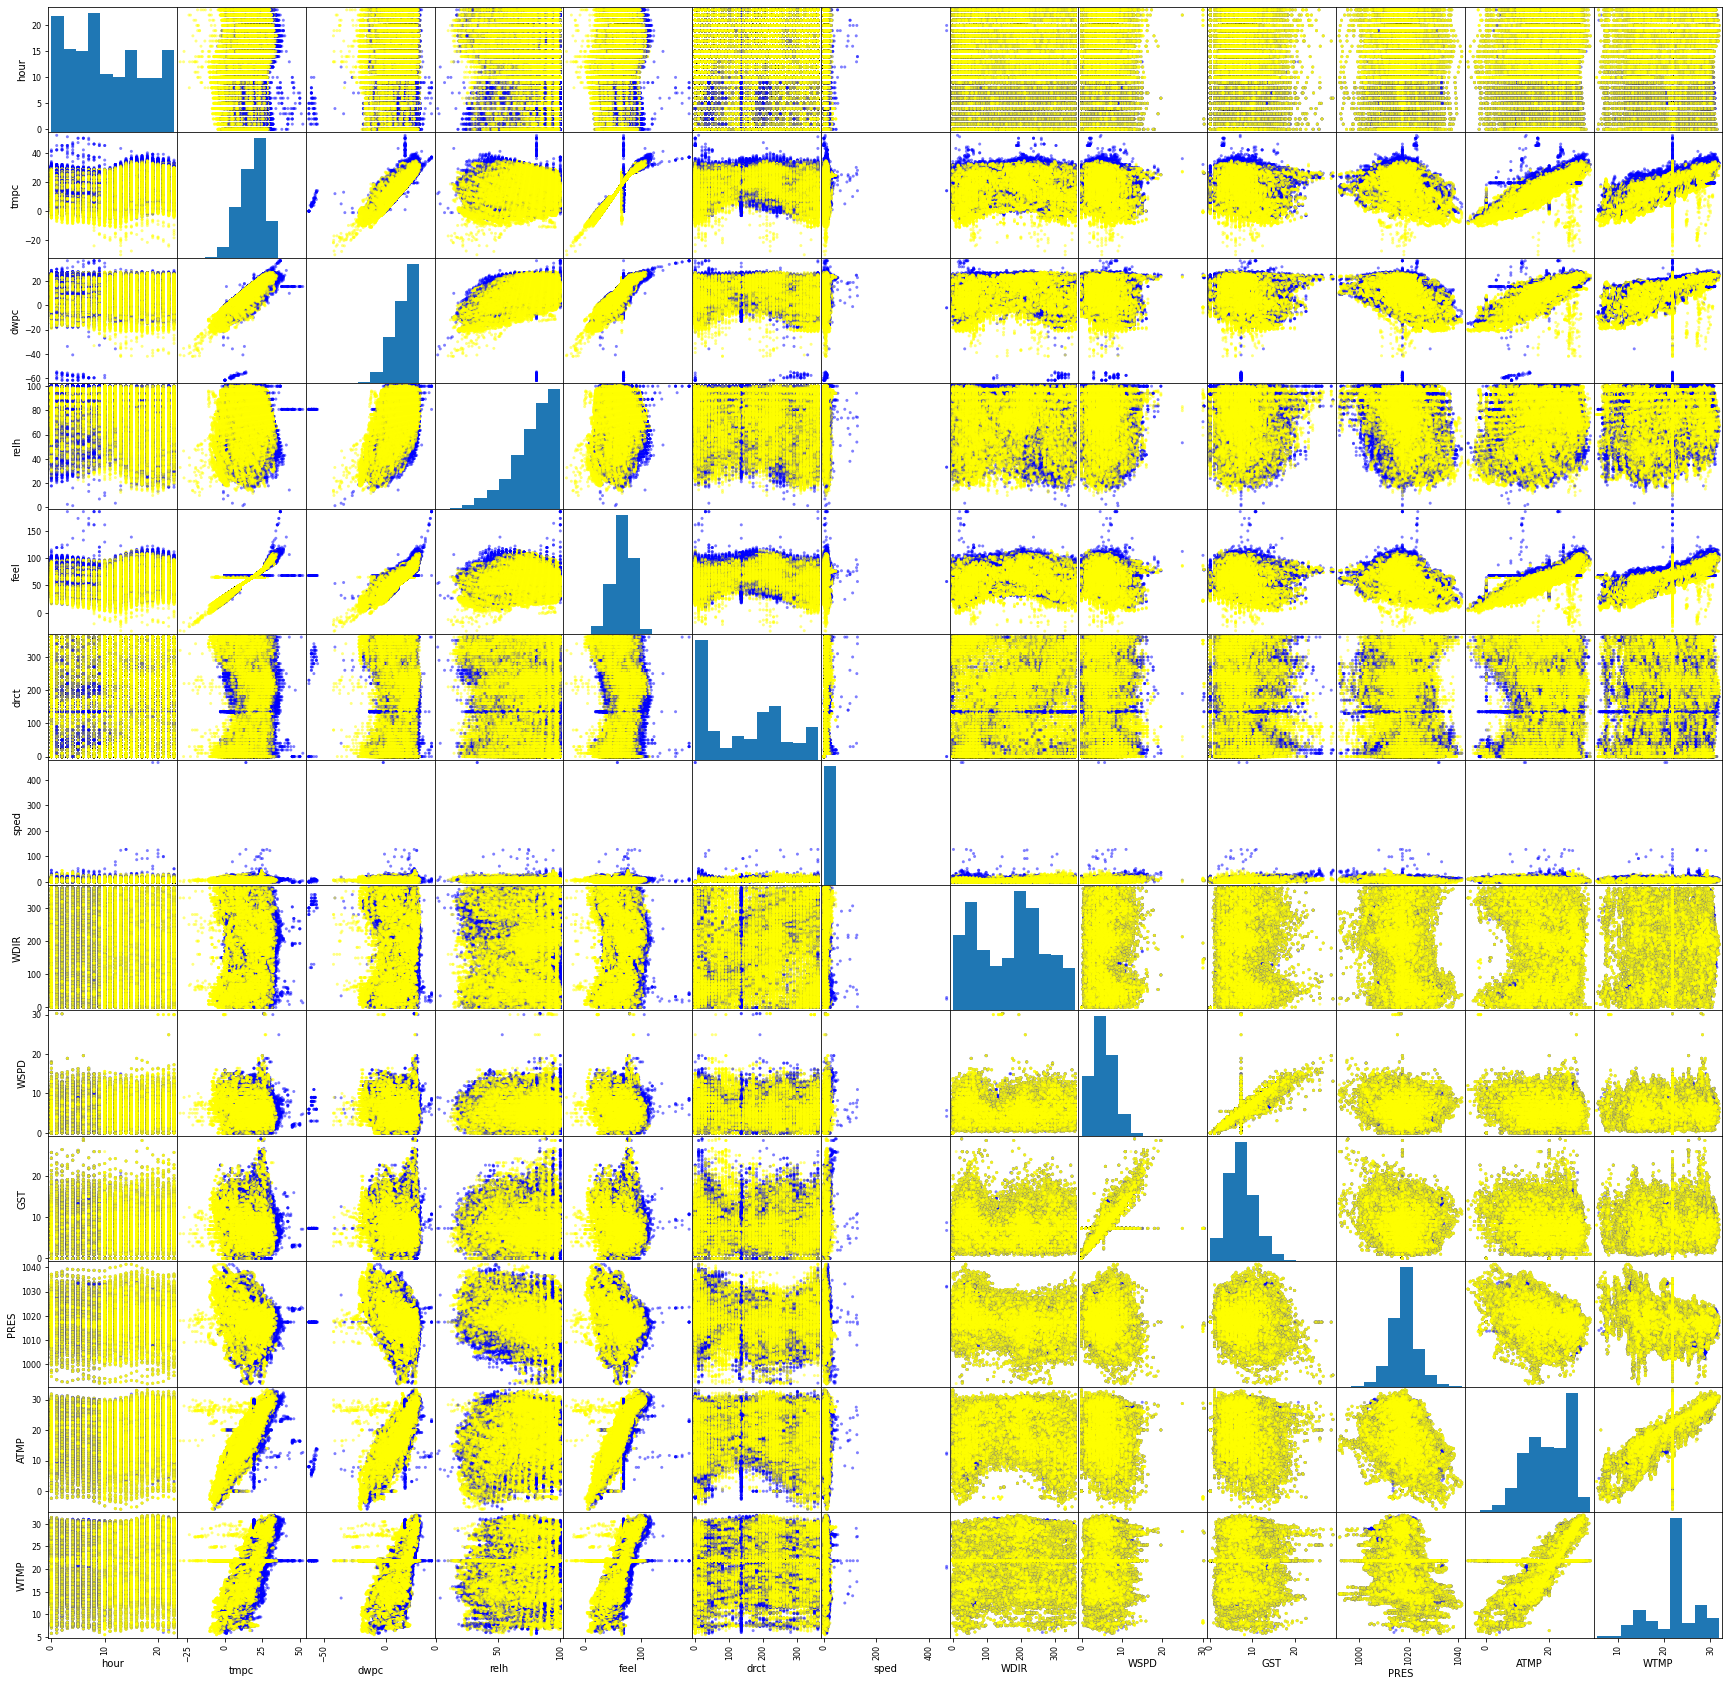

In [135]:
station_colors = {'HXD': "blue", "SUT": 'yellow'}

pd.plotting.scatter_matrix(data.loc[:, "hour":"WTMP"], figsize=(30,30), c= data['station'].map(station_colors))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65e7b38110>,
      dtype=object)

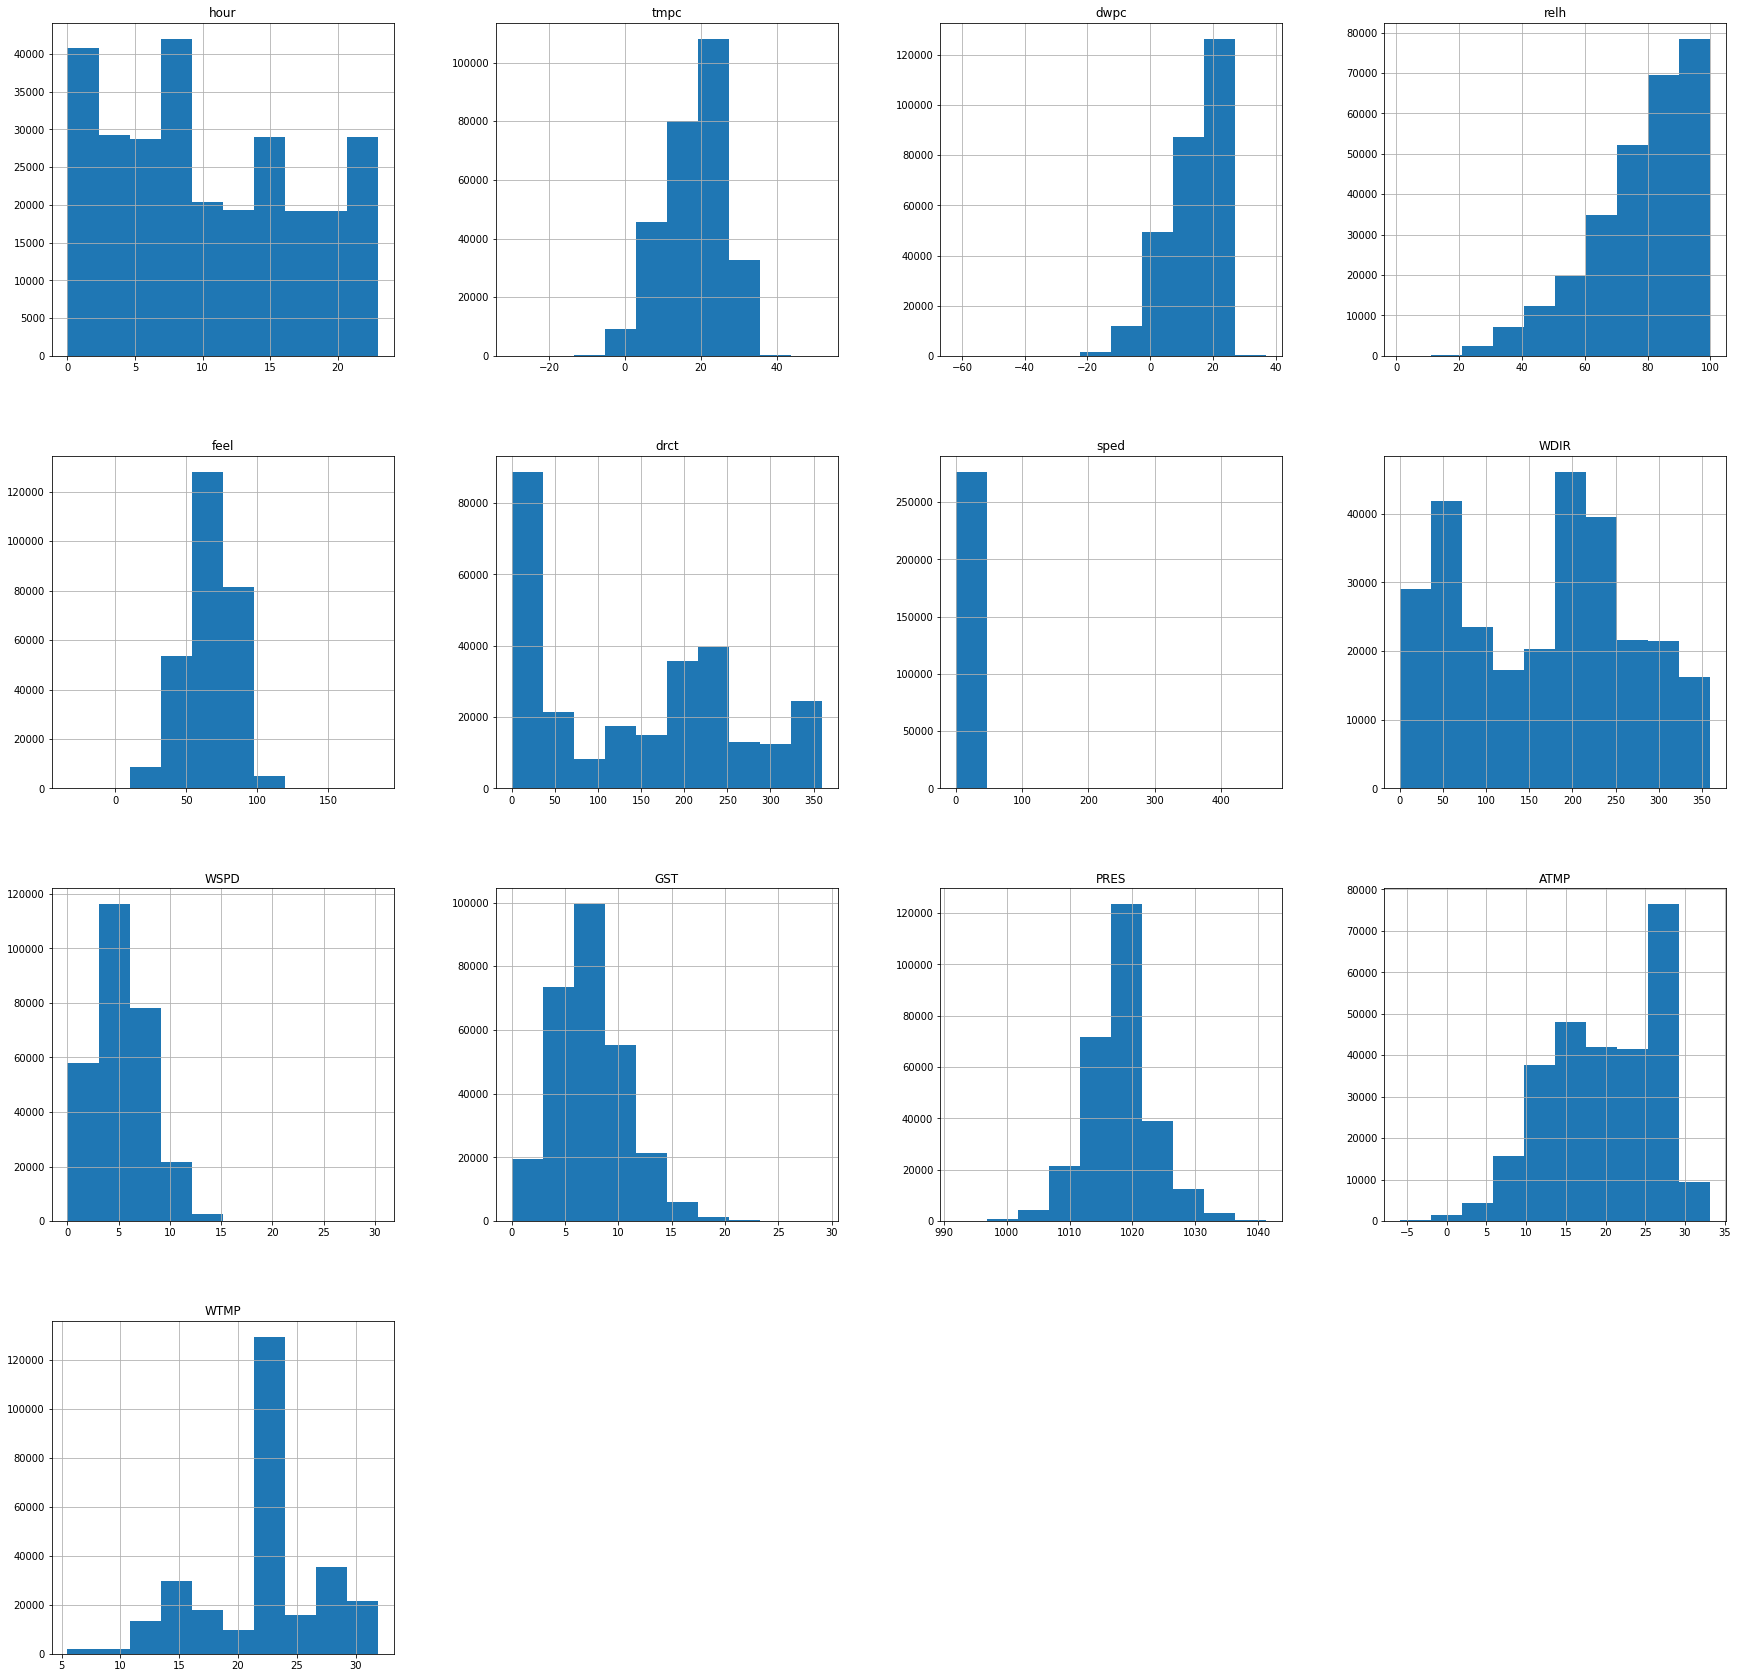

In [159]:
data.loc[:, :"WTMP"].hist(figsize = (30,30))

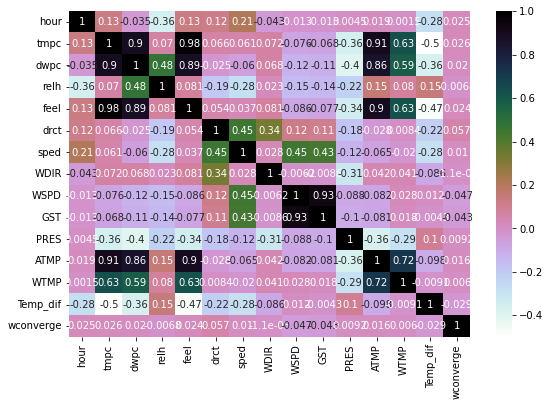

In [131]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65b27d9550>,
      dtype=object)

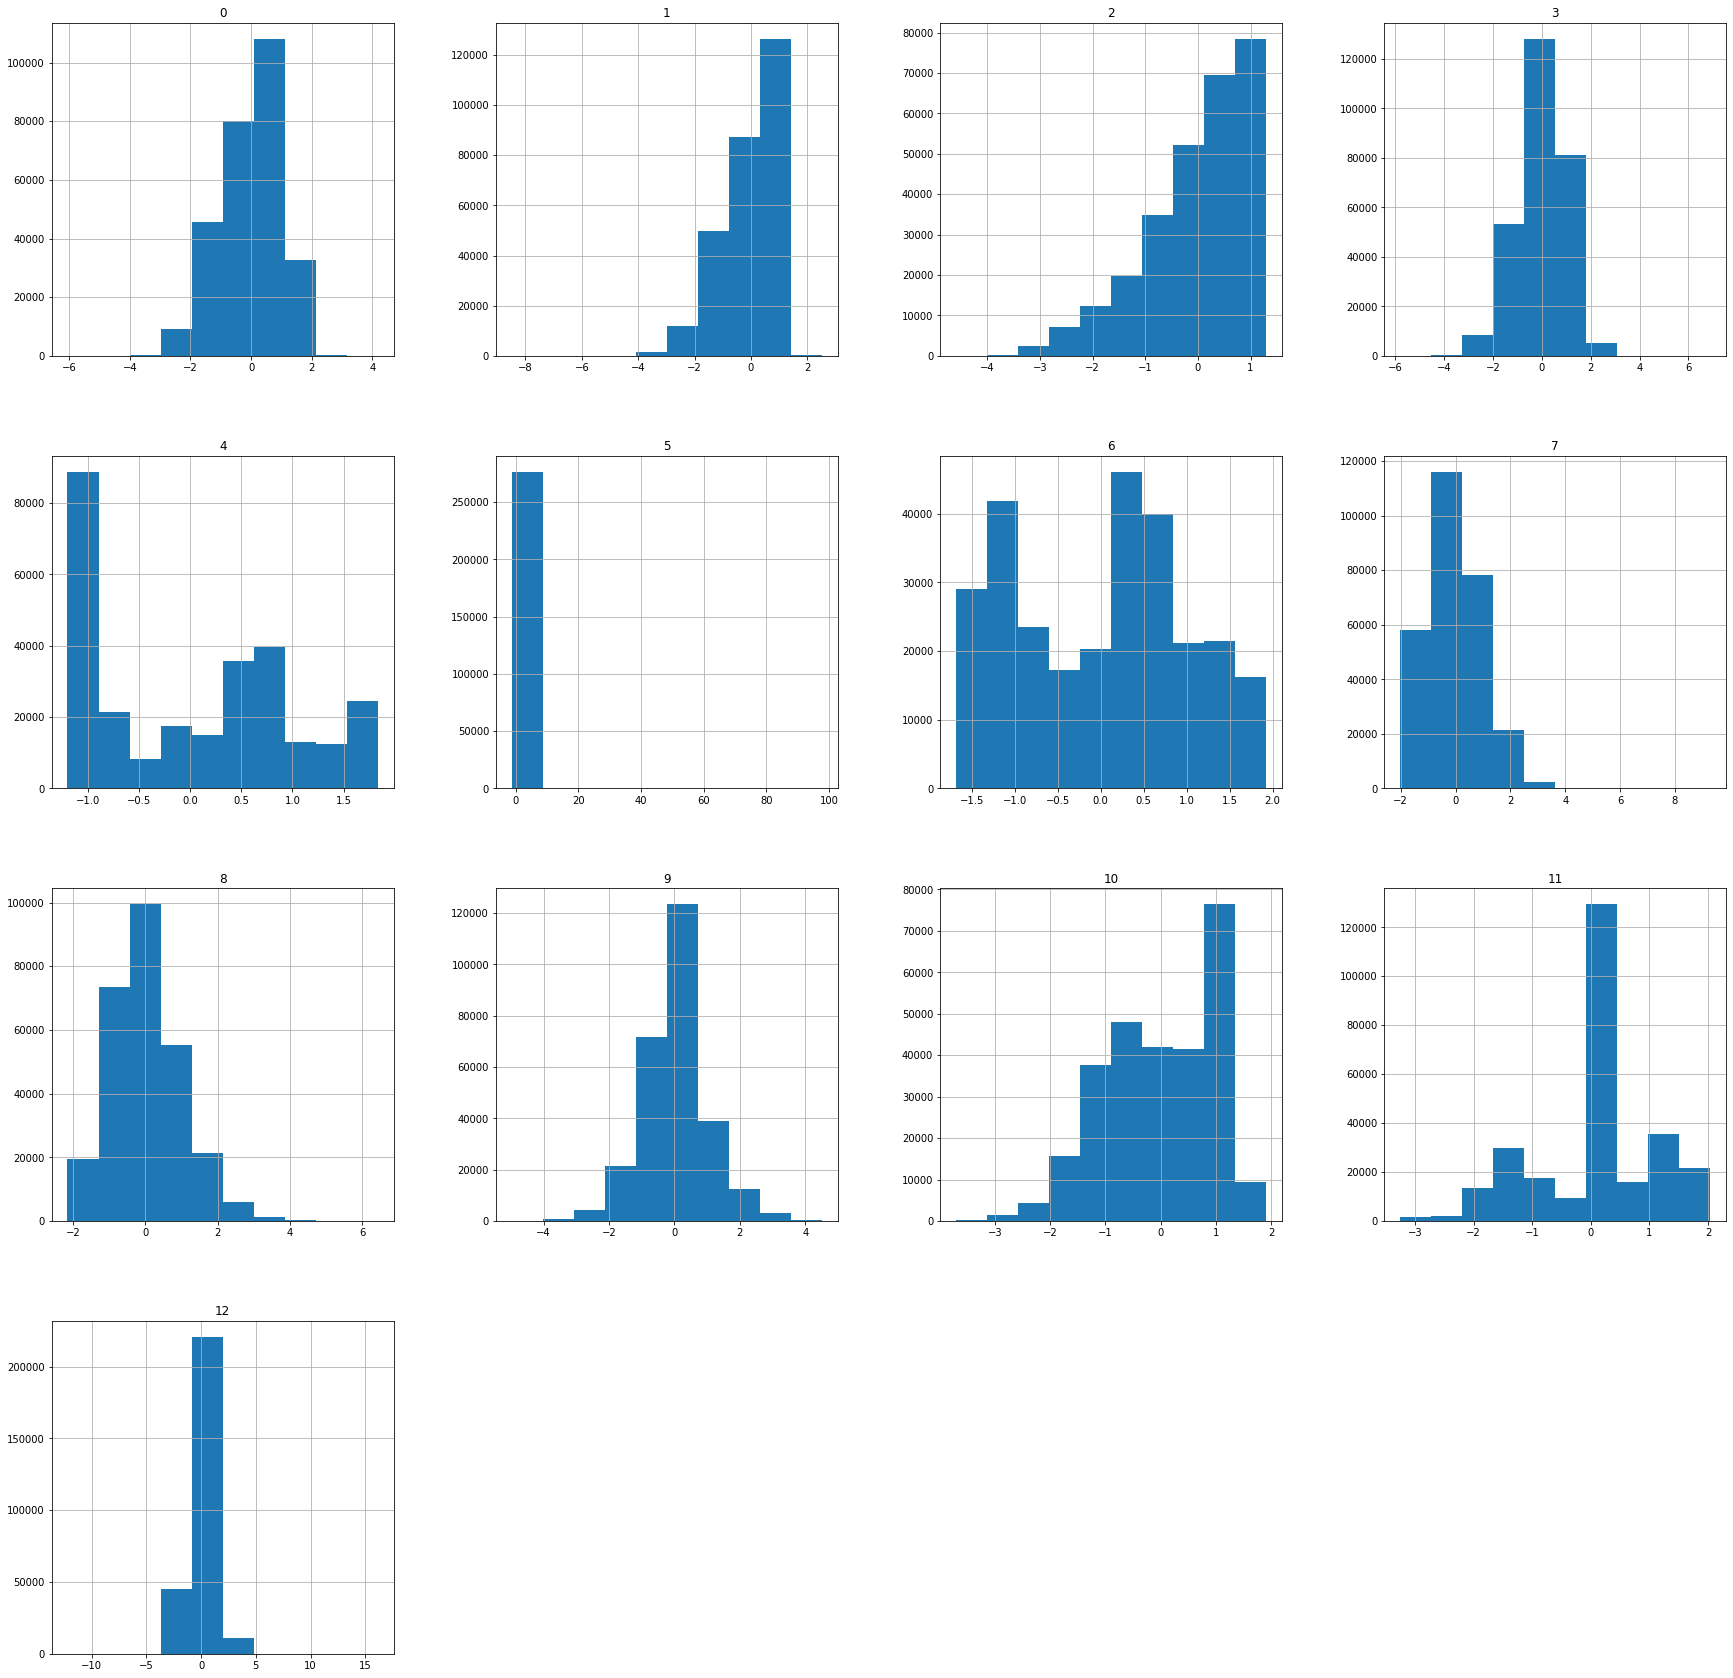

In [163]:
columns = ["tmpc", "dwpc", "relh", "feel", "drct", "sped", "WDIR", "WSPD", "GST", "PRES", "ATMP", "WTMP", "Temp_dif"]

scaled_data = pd.DataFrame(
    scaler.fit_transform(data[["tmpc", 
                               "dwpc", "relh", "feel", "drct", "sped", "WDIR", 
                               "WSPD", "GST", "PRES", "ATMP", "WTMP", "Temp_dif"]]))

scaled_data.hist(figsize = (30,30))

In [ ]:
.loc[:, :"WTMP"].hist(figsize = (30,30))

In [123]:
data_day = data[data["hour"].between(10,16)]

data_day.describe().transpose()

count         mean         std  ...          50%      75%      max
hour      68653.0    12.956375    2.018553  ...    13.000000    15.00    16.00
tmpc      68653.0    18.195362    8.517704  ...    19.300000    25.10    45.00
dwpc      68653.0    13.612267    9.295922  ...    16.000000    21.50    35.00
relh      68653.0    76.498502   16.930425  ...    78.760000    90.68   100.00
feel      68653.0    65.528123   18.550184  ...    66.740000    78.10   161.07
drct      68653.0   153.321647  126.441133  ...   170.000000   250.00   360.00
sped      68653.0     6.905398    4.514687  ...     6.900000     9.20   127.65
WDIR      68653.0   168.662995  112.222674  ...   191.000000   265.00   360.00
WSPD      68653.0     5.326502    2.737964  ...     5.000000     7.00    18.90
GST       68653.0     7.164445    3.444753  ...     7.000000     9.10    26.10
PRES      68653.0  1018.449060    5.249085  ...  1017.500000  1021.30  1041.30
ATMP      68653.0    19.229291    7.192400  ...    20.000000    26.00    33.00
WTMP      68653.0    21.566041    4.940941  ...    21.836225    24.10    31.20
Temp_dif  68653.0     1.033929    3.565879  ...     0.600000     2.80    55.20

[14 rows x 8 columns]

In [117]:
max_temp = max(data_day.groupby("date").tmpc)
min_temp = min(data_day.groupby("date").tmpc)

max_btemp = max(data_day.groupby("date").ATMP)
min_btemp = min(data_day.groupby("date").ATMP)

max_temp

In [132]:
min(data_day.Temp_dif)

-32.4

In [109]:
data_day.Temp_dif

47        3.10
48        3.10
49        2.50
50        2.40
51        2.10
          ... 
276816    2.71
276817    0.71
276818    1.09
276819    1.92
276820    1.92
Name: Temp_dif, Length: 68653, dtype: float64

In [134]:
converge = data_day[data_day["wconverge"] == True]

print(max(converge.Temp_dif))
print(min(converge.Temp_dif))
print(np.mean(converge.Temp_dif))

13.41
-5.399999999999999
-0.9399061214610912
